In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest

In [6]:
df = pd.read_csv('advertisement_clicks.csv')

In [7]:
df.head()

,advertisement_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


In [10]:
# in this exercise, we will conduct an A/B test on advertisement click data
# action == 1 represents a valid click through; action == 0 represents otherwise

# we will load in the data and perform a hypothesis test to answer the question:
# "Is there a significant difference in CTR?"
# we will assume a significance threshold of 5% 

In [37]:
xA = df[df['advertisement_id']=='A']['action'].dropna().to_numpy()

In [38]:
xB = df[df['advertisement_id']=='B']['action'].dropna().to_numpy()

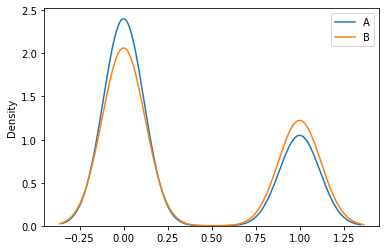

In [49]:
sns.kdeplot(xA, label='A')
sns.kdeplot(xB, label='B')
plt.legend();

In [50]:
xA.mean(), xB.mean()

(0.304, 0.372)

In [46]:
# two-sample test implementation
mu_hatA = xA.mean()
mu_hatB = xB.mean()
dmu_hat = mu_hatA - mu_hatB
s2_hatA = xA.var(ddof=1)
s2_hatB = xB.var(ddof=1)
s_hat = np.sqrt(s2_hatA / len(xA) + s2_hatB / len(xB))
z = dmu_hat / s_hat # reference value is 0
p_right = 1 - norm.cdf(np.abs(z))
p_left = norm.cdf(-np.abs(z))
p = p_left + p_right
z, p

(-3.2211732138019786, 0.0012766696301529461)

In [47]:
ztest(xA, xB)

(-3.2211732138019786, 0.0012766696301529544)

P-value of 0.00127 is small, so we reject the null hypothesis that the clickthrough rate for both advertisements are the same.

In [63]:
ztest(xA, xB, alternative = "smaller")

(-3.2211732138019786, 0.0006383348150764772)

P-value of 0.0006 is small, so we reject the null hypothesis that the CTR for advertisement A is equal to or greater than advertisement B in favour of the alternative.

The question of "What is the probability that A > B?" is better answered in  the Bayesian approach to A/B Testing.